In [1]:
import hw
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [129]:
class LogisticRegressionNN(nn.Module):
    def __init__(self):
        super(LogisticRegressionNN, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

def min_entropy(generator, title = 'Decision Boundary'):

    X_train, X_test, y_train, y_test = generator.data_split()

    X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

    net = LogisticRegressionNN()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(net.parameters(), lr = 0.01)

    epochs = 1000
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = net(X_train_tensor).squeeze()
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

    test = net(X_test_tensor).squeeze()
    pred = np.where(test >= 0.5, 1.0, 0.0)
    acc = accuracy_score(y_test, pred)
    print(f'PyTorch Accuracy: {acc:.4f}')
    
    sklearn_acc = hw.sklearn_logreg(X_train, y_train, X_test, y_test)
    print(f'Scikit-learn Accuracy: {sklearn_acc:.4f}')

    plot(net, X_train, y_train, f"{title} Decision Boundary")


def plot(net, X, y, title="Decision Boundary"):

    x_range = (np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1)
    y_range = (np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1)

    x_points = np.arange(x_range[0], x_range[1], 0.01)
    y_points = np.arange(y_range[0], y_range[1], 0.01)
    grid_x, grid_y = np.meshgrid(x_points, y_points)

    grid = torch.tensor(np.column_stack([grid_x.flatten(), grid_y.flatten()]), dtype = torch.float32)

    with torch.no_grad():
        Z = net(grid).squeeze().numpy()
        Z = np.where(Z >= 0.5, 1.0, 0.0).reshape(grid_x.shape)

    plt.figure()
    plt.contourf(grid_x, grid_y, Z, alpha = 0.5, cmap = 'summer')
    plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'k', cmap = 'summer')
    plt.title(title)


ValueError: 'cool warm' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

PyTorch Accuracy: 0.8667
Scikit-learn Accuracy: 0.8697


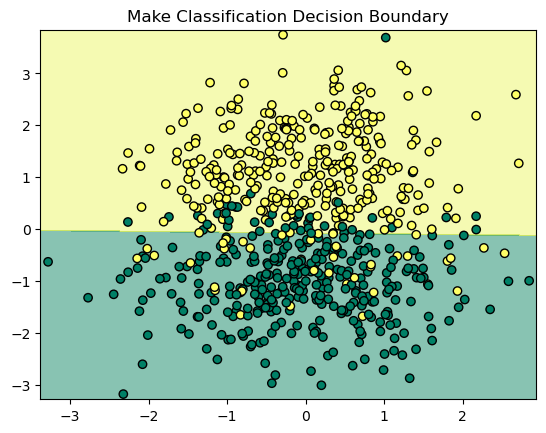

In [130]:
min_entropy(hw.Make_classification(1000),'Make Classification')

PyTorch Accuracy: 0.7970
Scikit-learn Accuracy: 0.8758


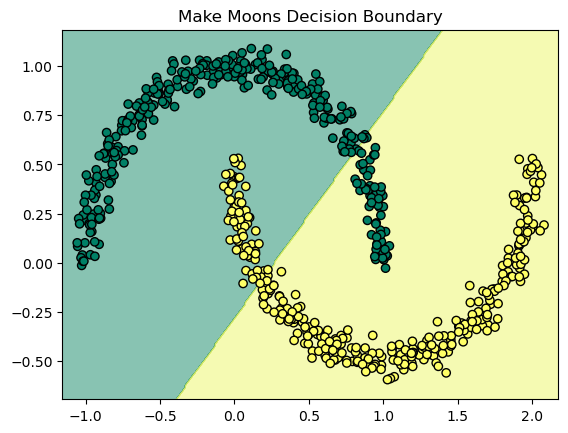

In [131]:
min_entropy(hw.Make_moons(1000), 'Make Moons')

PyTorch Accuracy: 0.4909
Scikit-learn Accuracy: 0.4606


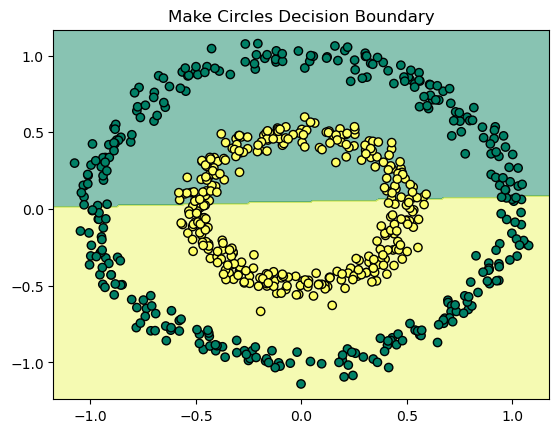

In [132]:
min_entropy(hw.Make_circles(1000), 'Make Circles')

In [94]:
print('Creating data using make_moons and make_circles decreases the accuracy of the classifier because the data forms shapes rather than splitting linearly like in make_classification.')

Creating data using make_moons and make_circles decreases the accuracy of the classifier because the data forms shapes rather than splitting linearly like in make_classification.
